In [99]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import vincenty
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Reading the files TRI data, Zillow condo data, zipcode centroid files

In [100]:

data_tri_2015 = pd.read_csv('TRI_2015_NC.csv')
data_zillow_condo = pd.read_csv('Zip_Zhvi_Condominum.csv')
data_region_centroids = pd.read_csv('zipcode/zipcode.csv')

In [101]:
data_columns = ['RegionName','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12']
data_zillow_condo = data_zillow_condo.loc[:,(data_columns)]

Keeping only the region name and 2015 related columns in the Zillow dataframe.

In [102]:
data_tri_2015.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,8.4_RECYCLING_ON-SITE,8.5_RECYCLING_OFF-SITE,8.6_TREATMENT_ON-SITE,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),8.8_ONE-TIME_RELEASE,PROD_RATIO_OR_ACTIVITY,8.9_PRODUCTION_RATIO,PARENT_COMPANY_NAME,PARENT_COMPANY_DB_NUMBER
0,2015,27709JMCSNONEIN,1.100120e+11,JMC (USA) INC,ONE INNOVATION DR,RESEARCH TRIANGLE PARK,DURHAM,NC,27709,NaN,...,0.0,0.0,0.0,0.0,0.00,0.0,NaN,0.00,JAPAN METALS & CHEMICALS CO LTD,NaN
1,2015,2803WBRLCM5CRRE,1.100460e+11,BORAL COMPOSITE INC,500 CORRELL ST,EAST SPENCER,ROWAN,NC,28039,NaN,...,0.0,0.0,0.0,0.0,140.00,NaN,PRODUCTION,1.12,BORAL USA,NaN
2,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,0.0,0.0,0.0,0.0,77.33,NaN,PRODUCTION,1.10,ALLEGHENY TECHNOLOGIES INC,949262737.0
3,2015,28328CMPBL224FA,1.100000e+11,CAMPBELL OIL & GAS CO,224 FAISON HWY,CLINTON,SAMPSON,NC,28328,NaN,...,0.0,0.0,0.0,0.0,0.00,NaN,ACTIVITY,1.00,CAMPBELL OIL & GAS CO,NaN
4,2015,28456FDRLPRIEGE,1.100100e+11,INTERNATIONAL PAPER RIEGELWOOD MILL,865 JOHN L.RIEGEL RD,RIEGELWOOD,COLUMBUS,NC,28456,NaN,...,0.0,0.0,0.0,0.0,37080.00,NaN,PRODUCTION,0.97,INTERNATIONAL PAPER CO,1316561.0


Renaming the column name from RegionName to ZIP - to make it compatible to merge with the TRI dataframe.
Renaming the latitude column name to CENTROID_LATITUDE, longitude to CENTROID_LONGITUDE, to keep the names more meaningful.
Keeping only the relevant useful columns from the actual dataframe.

In [103]:
data_zillow_condo.rename(columns={'RegionName':'ZIP'},inplace=True)

In [104]:
data_region_centroids.rename(columns = {'zip':'ZIP','latitude':'CENTROID_LATITUDE','longitude':'CENTROID_LONGITUDE'},inplace=True)

In [105]:
data_columns1 = ['ZIP','CENTROID_LATITUDE','CENTROID_LONGITUDE']
data_region_centroids = data_region_centroids.loc[:,(data_columns1)]


Merge the TRI and Zillow_condo dataframes

In [106]:
data_common_tri_zillow = pd.merge(data_tri_2015,data_zillow_condo)

In [107]:
data_common_tri_zillow.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100
1,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100
2,2015,28012CRSPH181WD,1.100310e+11,CARUS CORP BELMONT SITE,181 WOODLAWN AVE,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100
3,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100
4,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,145800,147500,148000,148000,148500,149800,150900,150600,150000,151100


Merge the TRI_Zillow merged dataframe with the data_centroid dataframe

In [108]:
data_common_tri_zillow_centroid = pd.merge(data_common_tri_zillow,data_region_centroids)

In [109]:
data_common_tri_zillow_centroid.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028
1,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028
2,2015,28012CRSPH181WD,1.100310e+11,CARUS CORP BELMONT SITE,181 WOODLAWN AVE,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028
3,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028
4,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028


Define a function "calculate_distance" used to calculate the distance between the facility and the centorid of the zip that the facility is located in.

In [110]:
def calculate_distance(df):
    return vincenty((df['LATITUDE'],df['LONGITUDE']),(df['CENTROID_LATITUDE'],df['CENTROID_LONGITUDE'])).miles
    

Apply the "calculate_distance" function to each facility in the dataframe and add a new column 'DIST_FROM_CENTROID' storing the calculated value for each facility.

In [111]:
data_common_tri_zillow_centroid['DIST_FROM_CENTROID']=data_common_tri_zillow_centroid.apply(calculate_distance,axis=1)



The new column values for DIST_FROM_CENTROID look as below

In [112]:
data_common_tri_zillow_centroid[['LATITUDE','LONGITUDE','CENTROID_LATITUDE','CENTROID_LONGITUDE','DIST_FROM_CENTROID']]

,LATITUDE,LONGITUDE,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID
0,35.190083,-81.008748,35.240600,-81.04028,3.912845
1,35.190083,-81.008748,35.240600,-81.04028,3.912845
2,35.269069,-81.046299,35.240600,-81.04028,1.991895
3,35.190083,-81.008748,35.240600,-81.04028,3.912845
4,35.190083,-81.008748,35.240600,-81.04028,3.912845
5,35.190083,-81.008748,35.240600,-81.04028,3.912845
6,35.190083,-81.008748,35.240600,-81.04028,3.912845
7,35.190083,-81.008748,35.240600,-81.04028,3.912845
8,35.190083,-81.008748,35.240600,-81.04028,3.912845
9,35.190083,-81.008748,35.240600,-81.04028,3.912845


In [113]:
data_common_tri_zillow_centroid.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID
0,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028,3.912845
1,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028,3.912845
2,2015,28012CRSPH181WD,1.100310e+11,CARUS CORP BELMONT SITE,181 WOODLAWN AVE,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028,1.991895
3,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028,3.912845
4,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148000,148500,149800,150900,150600,150000,151100,35.2406,-81.04028,3.912845


Calculate the mean of house prices through the months of 2015 and store in AVG_PRICE column. 

In [114]:
cols=['2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12']
data_common_tri_zillow_centroid['AVG_PRICE'] = data_common_tri_zillow_centroid[cols].mean(axis=1)
data_common_tri_zillow_centroid

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID,AVG_PRICE
0,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
1,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
2,2015,28012CRSPH181WD,1.100310e+11,CARUS CORP BELMONT SITE,181 WOODLAWN AVE,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,1.991895,148050.000000
3,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
4,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
5,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
6,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
7,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
8,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000
9,2015,28012DKNRG253PL,1.100000e+11,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,253 PLANT ALLEN RD,BELMONT,GASTON,NC,28012,NaN,...,148500,149800,150900,150600,150000,151100,35.240600,-81.04028,3.912845,148050.000000


Looking for facilities whose distance from the centroid DIST_FROM_CENTROID is less than 1 mile, storing it in data_within_1_mile

In [115]:
data_within_1_mile=data_common_tri_zillow_centroid[data_common_tri_zillow_centroid.DIST_FROM_CENTROID<1]

In [116]:
data_within_1_mile.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID,AVG_PRICE
85,2015,28120CKLSP801WC,1.100550e+11,CEKAL SPECIALTIES INC,101 BRICKYARD RD,MOUNT HOLLY,GASTON,NC,28120,NaN,...,141000,141600,141900,142600,143500,144300,35.311862,-81.02441,0.824851,140158.333333
111,2015,2783WRDYMX699NG,1.100010e+11,ARGOS READY MIX GREENVILLE CONCRETE PLANT,699 N GREENE ST,GREENVILLE,PITT,NC,27834,NaN,...,64900,65200,65500,65500,65400,65100,35.626653,-77.37896,0.352127,64483.333333
132,2015,28655DNCRP105WA,1.100000e+11,MERITOR INC,105 WAMSUTTA MILL RD,MORGANTON,BURKE,NC,28655,NaN,...,108200,108400,107300,106400,106100,106100,35.742752,-81.71625,0.478520,107300.000000
146,2015,28655DNCRP105WA,1.100000e+11,MERITOR INC,105 WAMSUTTA MILL RD,MORGANTON,BURKE,NC,28655,NaN,...,108200,108400,107300,106400,106100,106100,35.742752,-81.71625,0.478520,107300.000000
148,2015,28655DNCRP105WA,1.100000e+11,MERITOR INC,105 WAMSUTTA MILL RD,MORGANTON,BURKE,NC,28655,NaN,...,108200,108400,107300,106400,106100,106100,35.742752,-81.71625,0.478520,107300.000000


Trying to plot the sum of on-site-release-total grouping by each chemical. We notice that the most on-site-release-total is being released by the below mentioned chemicals.
first - Methanol, second - Sulphuric Acid, third - Manganese compounds.

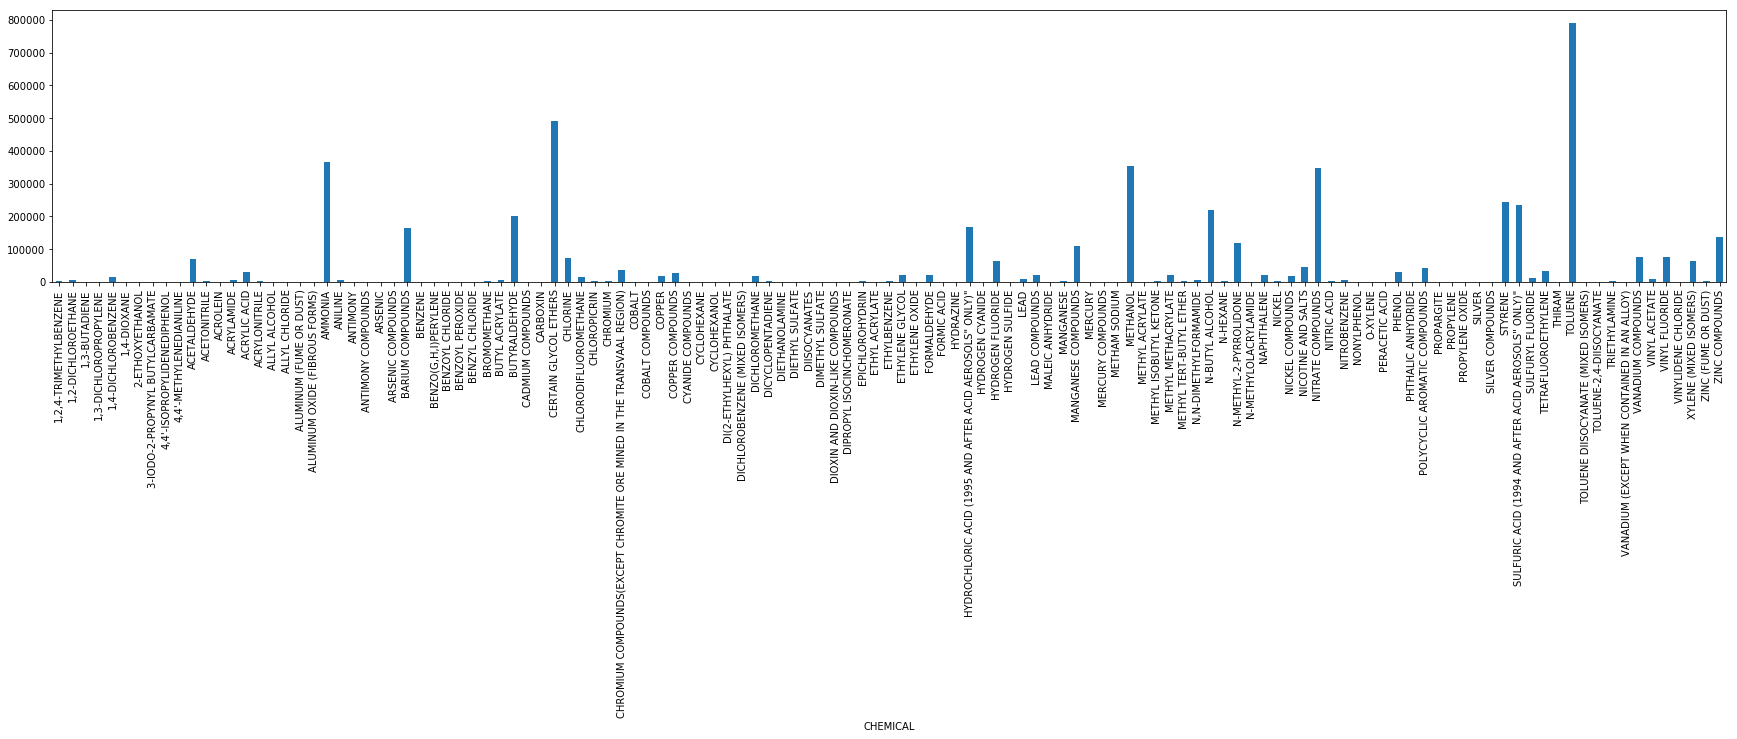

In [117]:
data_common_tri_zillow_centroid.groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='CHEMICAL',y='sum',kind = 'bar',figsize=(30,5))

For all those facilities whose ON-SITE_RELEASE_TOTAL is greater than 0, I'm trying to group by chemical and calculate the mean of average prices of the places. the graph shows that the mean of average price is highest at the chemical ANTIMONY. (Yet to figure out if this information reveals any inference to the correlation of housing prices)

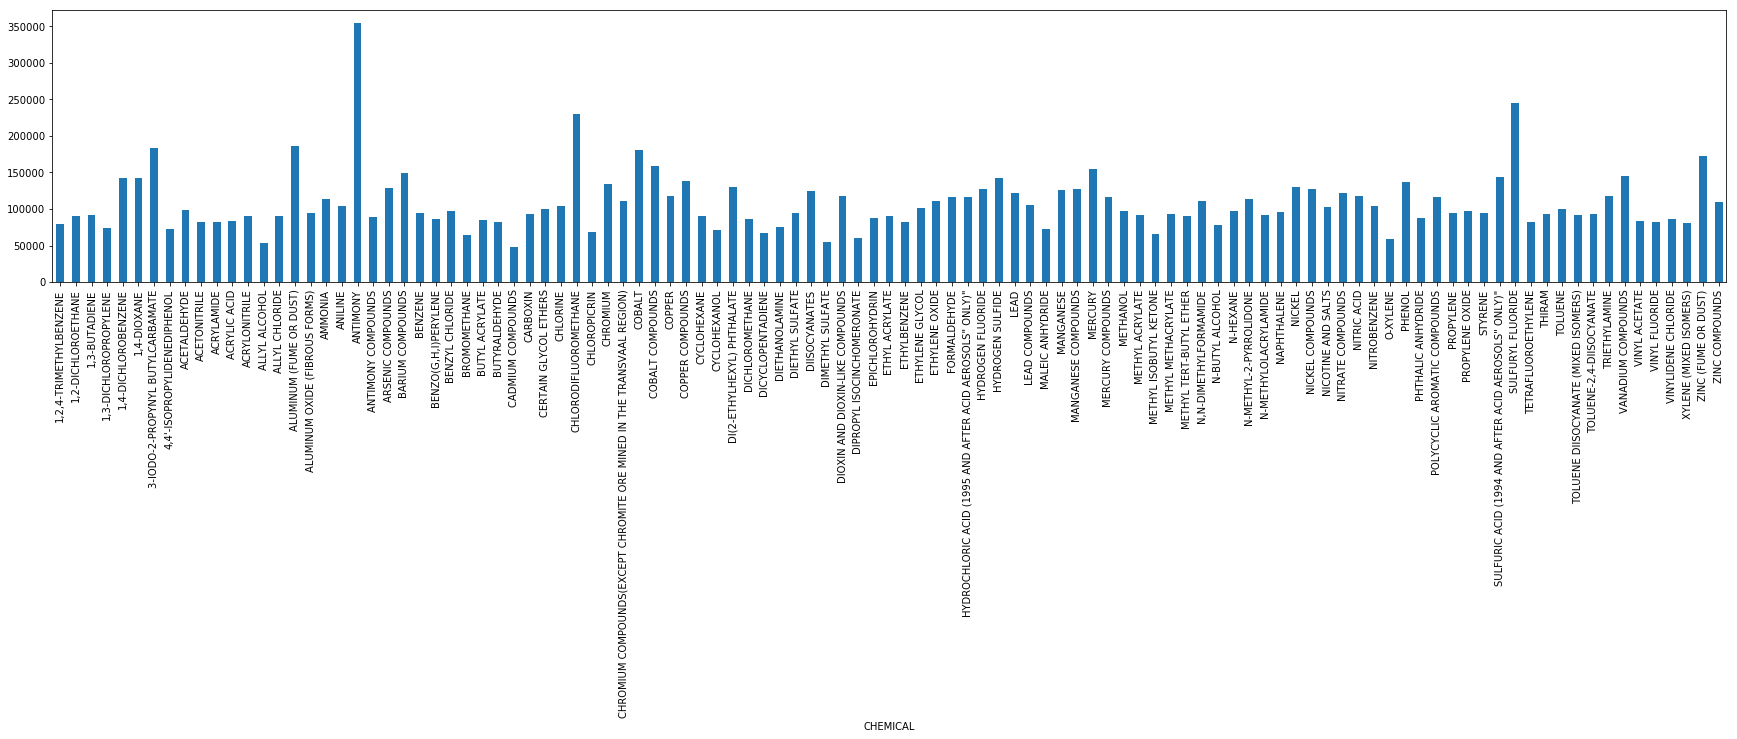

In [118]:
data_common_tri_zillow_centroid[data_common_tri_zillow_centroid['ON-SITE_RELEASE_TOTAL']>0].groupby(['CHEMICAL'])['AVG_PRICE'].agg('mean').plot(x='CHEMICAL',y='AVG_PRICE',kind = 'bar',figsize=(30,5))

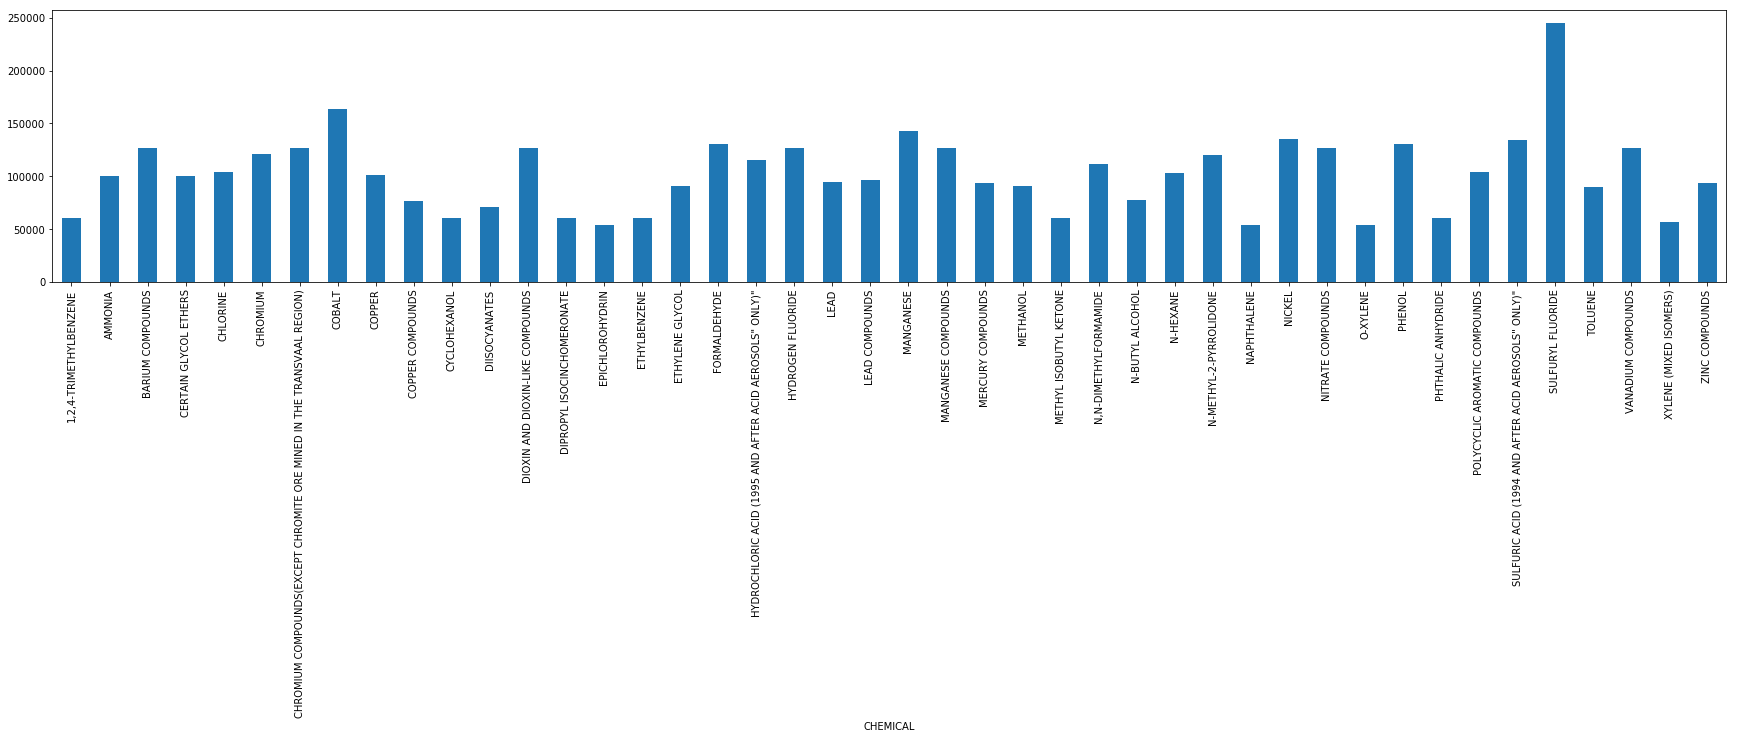

In [119]:
data_within_1_mile[data_within_1_mile['ON-SITE_RELEASE_TOTAL']>0].groupby(['CHEMICAL'])['AVG_PRICE'].agg('mean').plot(x='CHEMICAL',y='AVG_PRICE',kind = 'bar',figsize=(30,5))

Plotted the sum of on-site-release-total grouping by each Carcinogenic chemical . We notice that the most on-site-release-total is being released by the chemical first - Styrene, second - Acetaldehyde, third - Formaldehyde.

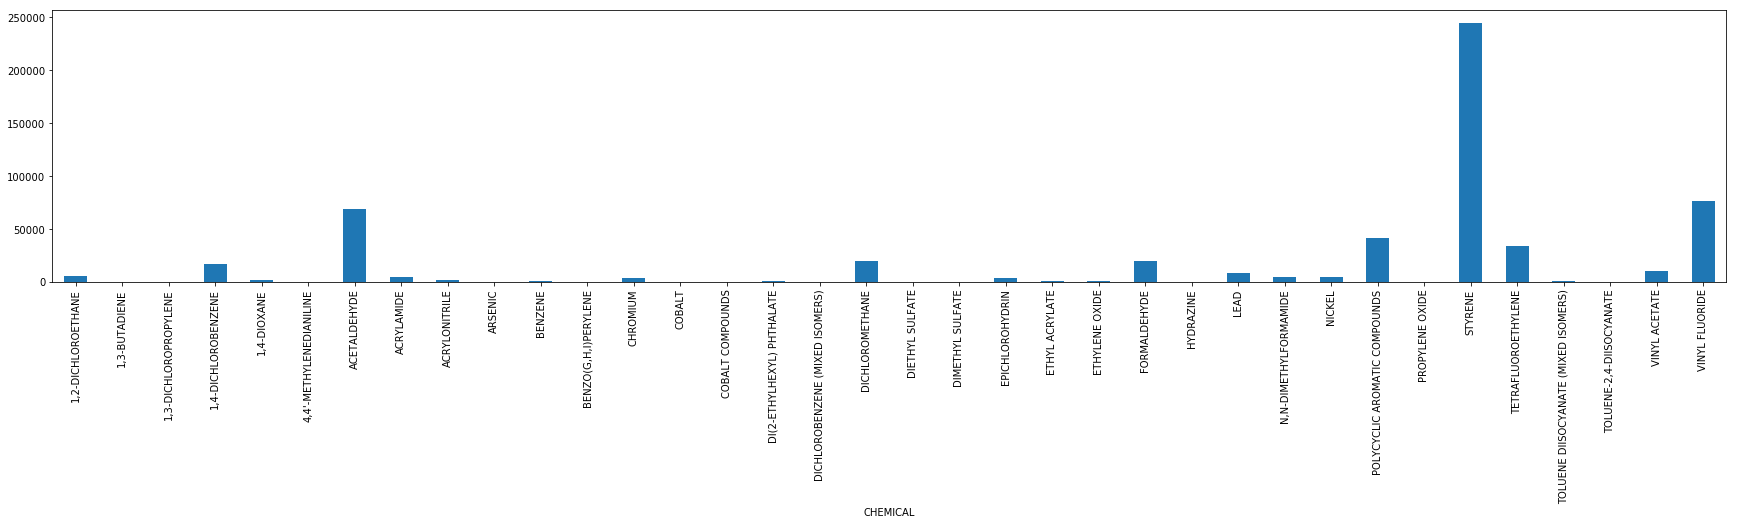

In [120]:
data_common_tri_zillow_centroid1 = data_common_tri_zillow_centroid[data_common_tri_zillow_centroid.CARCINOGEN == 'YES']

data_common_tri_zillow_centroid1.groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='CHEMICAL',y='sum',kind = 'bar',figsize=(30,5))

For the facilities within 1 mile of centroid, Plot the sum of ON-SITE_RELEASE_TOTAL grouped by TRI_FACILITY_ID,INDUSTRY_SECTOR.We can notice that 28704SHVLL200CP, Electric Utilities shows the highest Onsite Release total.

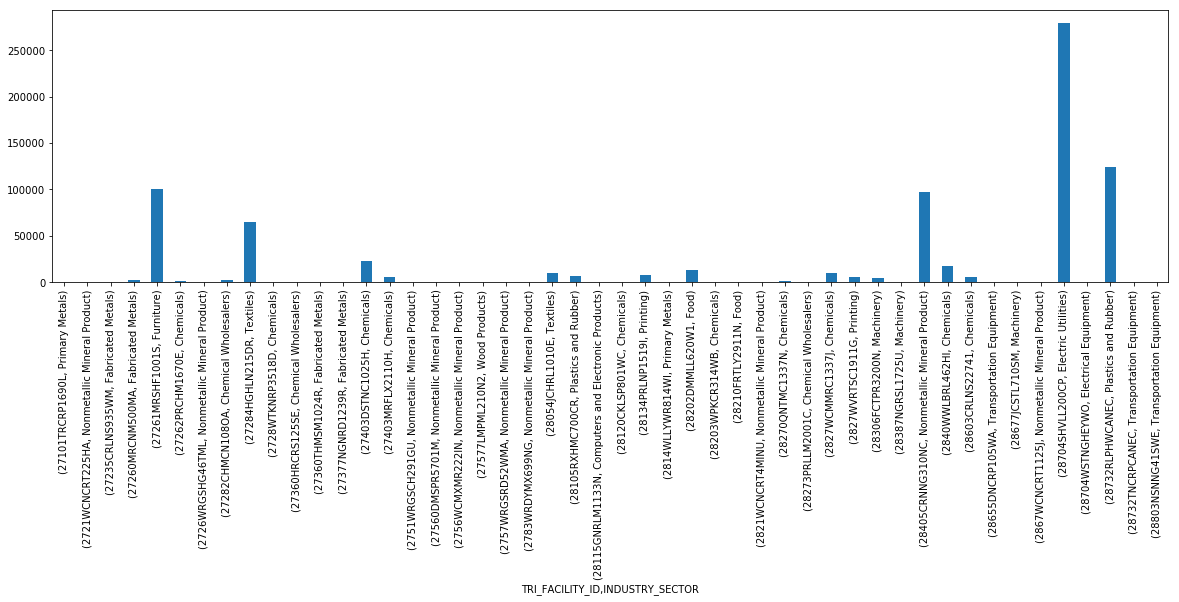

In [121]:
data_within_1_mile.groupby(['TRI_FACILITY_ID','INDUSTRY_SECTOR'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='INDUSTRY_SECTOR',y='sum',kind = 'bar',figsize=(20,5))

For the facilities within 1 mile of centroid, Plot the sum of ON-SITE_RELEASE_TOTAL grouped by CHEMICAL.We can notice that Baruim Compounds shows the highest Onsite Release total.



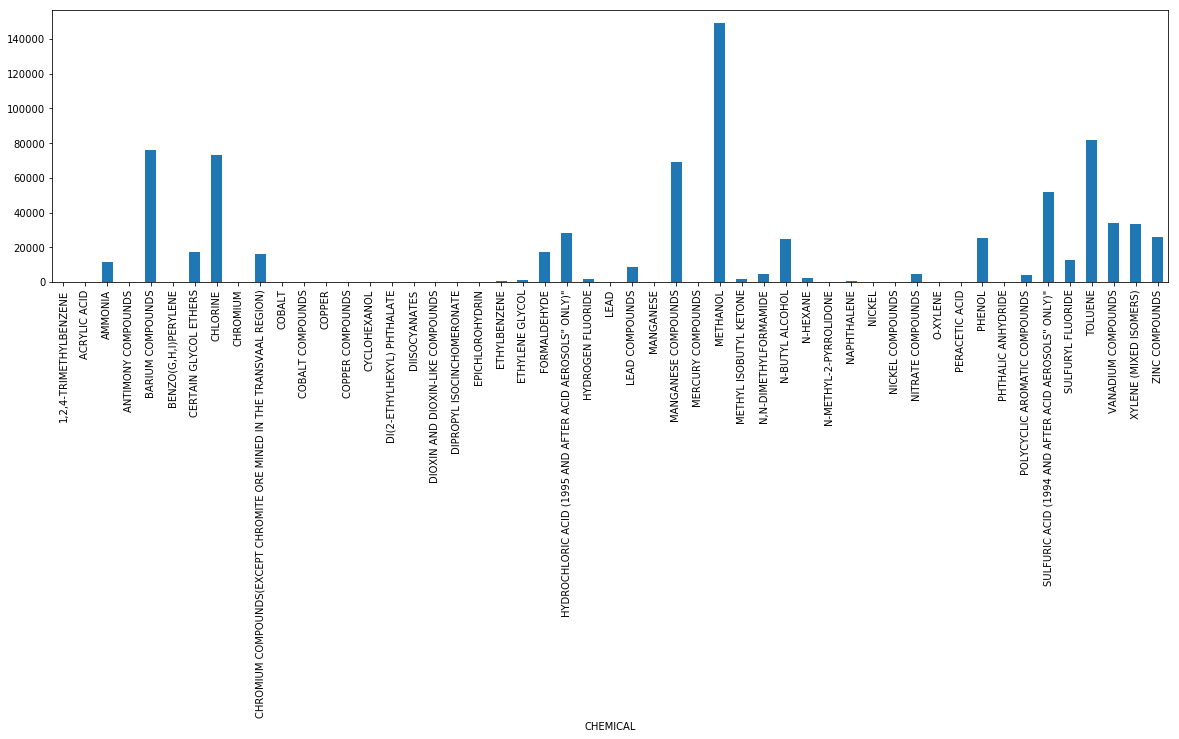

In [122]:
data_within_1_mile.groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='CHEMICAL',y='sum',kind = 'bar',figsize=(20,5))

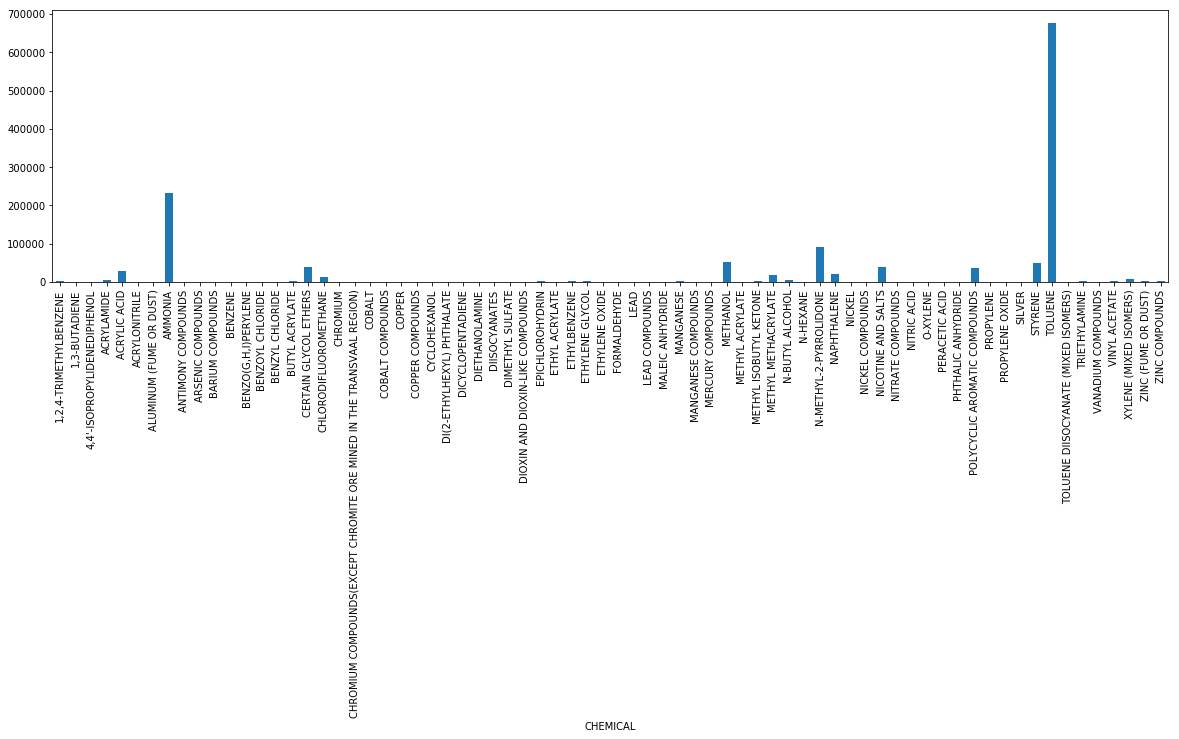

In [123]:
data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=1) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <2)].groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='CHEMICAL',y='sum',kind = 'bar',figsize=(20,5))

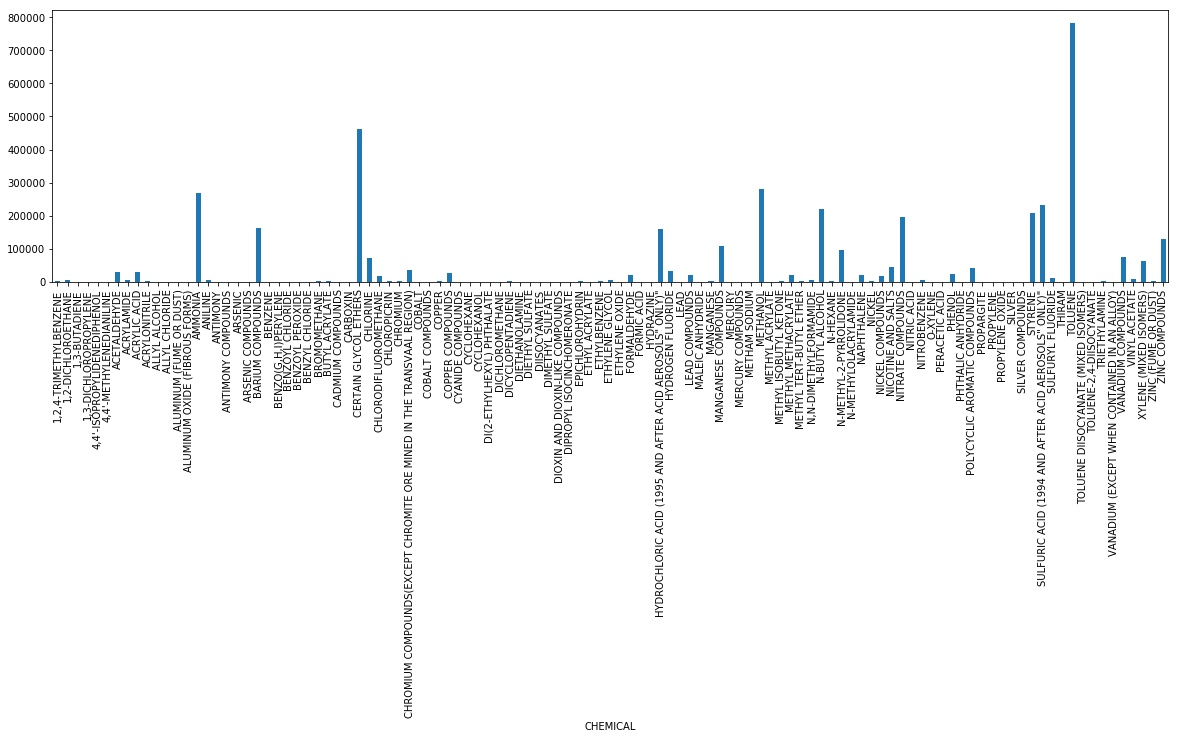

In [136]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <4)].groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='CHEMICAL',y='sum',kind = 'bar',figsize=(20,5))

For the facilities within 1 mile of centroid, Plot the sum of ON-SITE_RELEASE_TOTAL grouped by CHEMICAL.We can notice that Methanol shows the highest Onsite Release total.

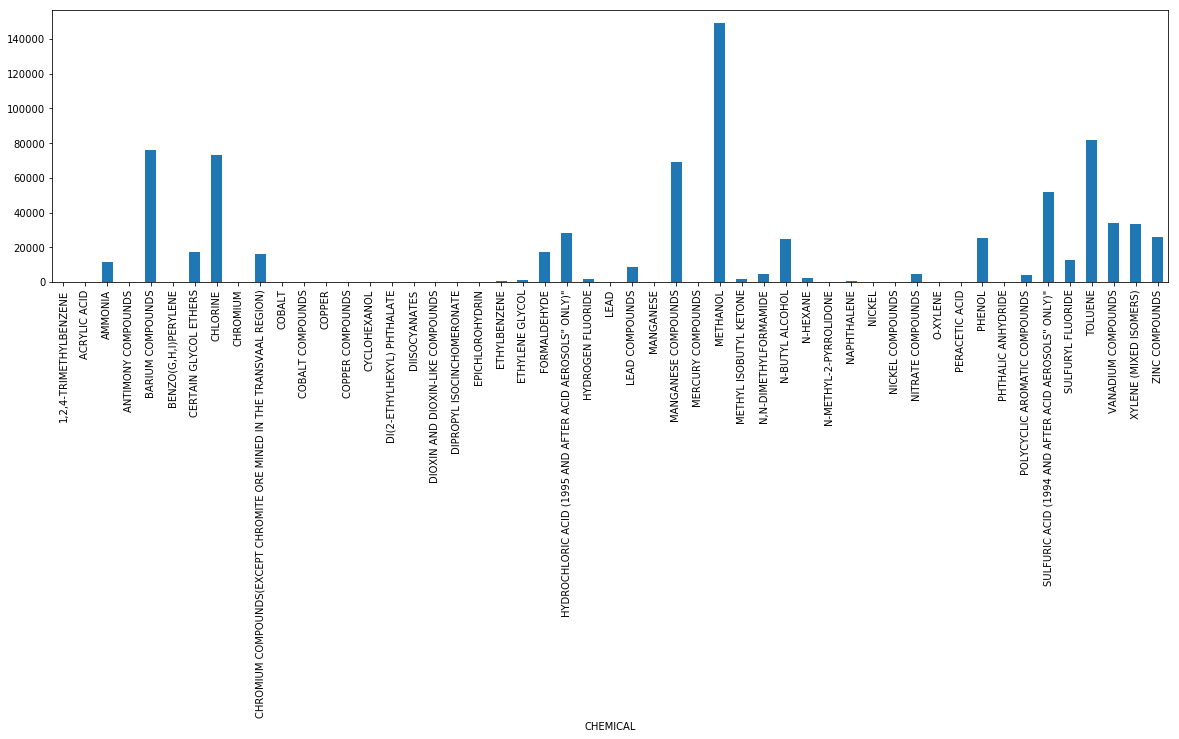

In [137]:
data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID <1)].groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].agg('sum').plot(x='CHEMICAL',y='sum',kind = 'bar',figsize=(20,5))

Plotted the values of INDUSTRY_SECTOR and mean of the AVG PRICE of houses for a distance range 1,2,3,4,5 miles from the centroid, in the below graphs. The results are as seen

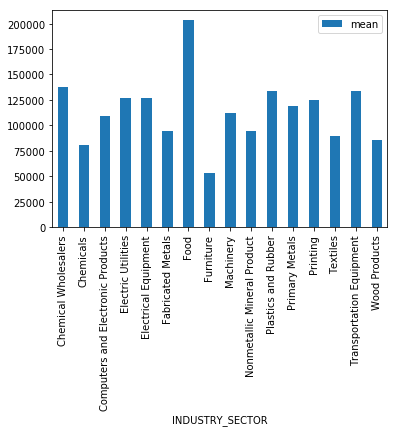

In [126]:
data_within_1_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

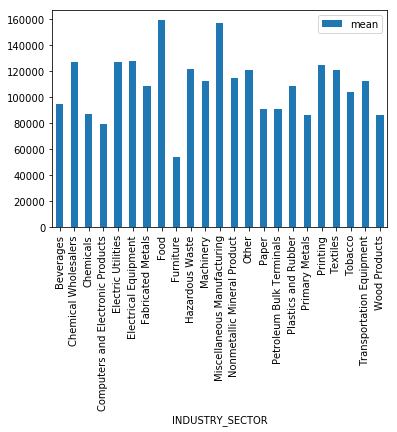

In [127]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <2)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

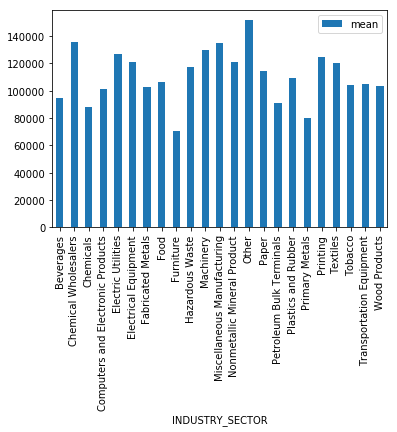

In [128]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <3)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

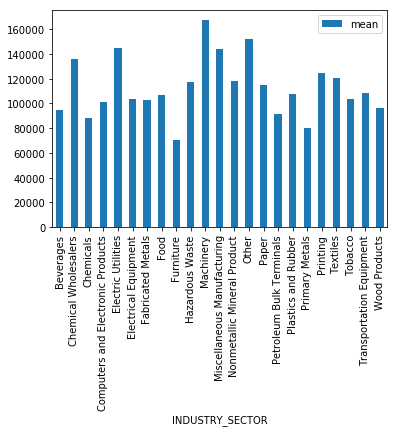

In [129]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <4)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

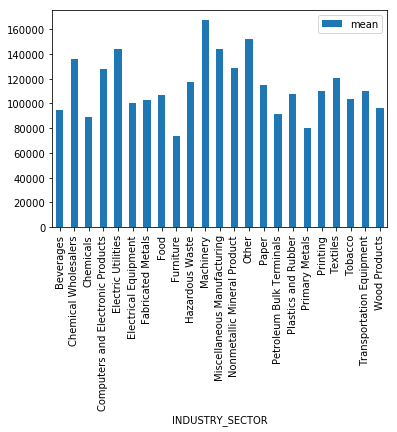

In [130]:
data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID <5)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

Plotted the above graphs in a pie graph and the results are as below.

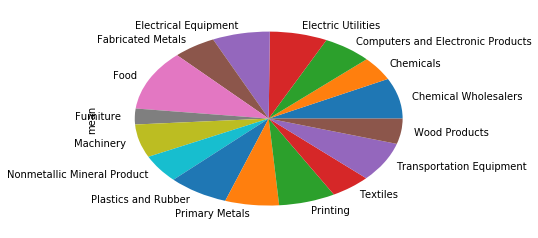

In [131]:
data_within_1_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '') 

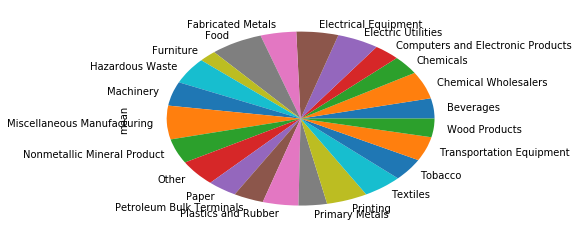

In [132]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <2)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

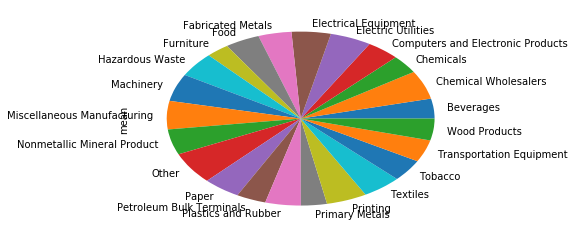

In [133]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <3)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

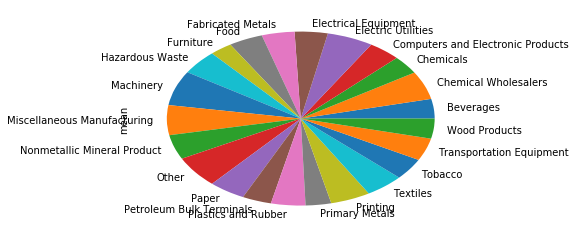

In [134]:
data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID <4)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

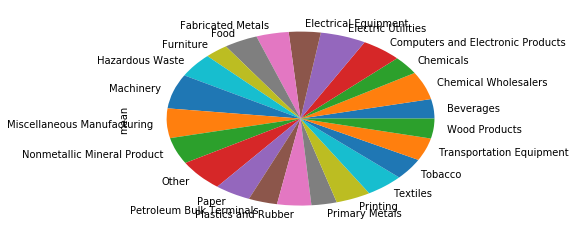

In [135]:
data_common_tri_zillow_centroid[ (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <5)].groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend='')